0.0024935259


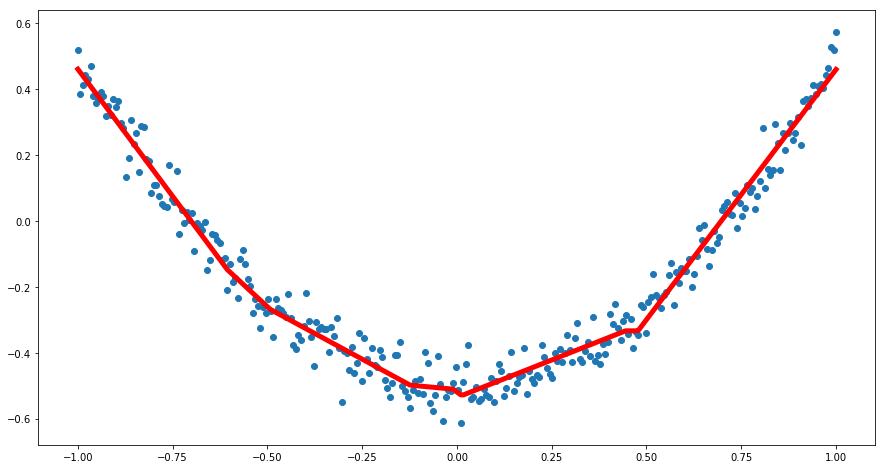

In [19]:
import tensorflow as tf
from IPython import display
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pylab
pylab.rcParams['figure.figsize'] = (15.0, 8.0) # 显示大小


def add_layer(inputs, in_size, out_size, activation_function=None):  # 一层神经网络
    W = tf.Variable(tf.random_normal([in_size, out_size]))  # 权值
    biases = tf.Variable(tf.zeros([1, out_size]) + 0.1)  # 偏值
    Wx_plus_b = tf.matmul(inputs, W) + biases  # 未激活的函数 y = W x + b 未被激活函数弯曲
    if activation_function is None:
        outputs = Wx_plus_b
    else:
        outputs = activation_function(Wx_plus_b)
    return outputs


x_data = np.linspace(-1, 1, 300)[:, np.newaxis]
noise = np.random.normal(0, 0.05, x_data.shape)
y_data = np.square(x_data) - 0.5 + noise

xs = tf.placeholder(tf.float32, [None, 1])  # 这两个就是先把位置空出来，让变量可以带进去
ys = tf.placeholder(tf.float32, [None, 1])

l1 = add_layer(xs, 1, 10, activation_function=tf.nn.relu)
predition = add_layer(l1, 10, 1, activation_function=None)

loss = tf.reduce_mean(tf.reduce_sum(tf.square(ys - predition), reduction_indices=[1]))  # 这个是误差（均方差），通过均方差反向传输
# 最传统的方法是GDO，最新最好的方法是Adam
train_step = tf.train.AdamOptimizer(0.05).minimize(loss)
# train_step = tf.train.GradientDescentOptimizer(0.05).minimize(loss)  # 通过这个优化器减小误差，注意学习效率（跨步）不要太大
fig = plt.figure()
ax=fig.add_subplot(1,1,1)
ax.scatter(x_data,y_data)
plt.ion()
# plt.show()
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())  # 所有变量初始化
    for i in range(2000):
        sess.run(train_step, feed_dict={xs: x_data, ys: y_data})
        if i % 50 == 0:
            display.clear_output(wait=True)
            print(sess.run(loss, feed_dict={xs: x_data, ys: y_data}))
    predition_value = sess.run(predition, feed_dict={xs: x_data})
    lines = ax.plot(x_data, predition_value, 'r-', lw=5)
    plt.pause(0.1)
